In [1]:
import sys
sys.path.append('../')
sys.path.append('../performance_tools/')

In [2]:
from textpair.single.paddle_bow import PaddleBowSim
from textpair.single.ann import Ann
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

import os
import pandas as pd
import numpy as np
from tqdm import tqdm

from dumb_containers import evaluate_performance

In [3]:
VOCAB_FILE = '../data/paddle_models/sim_net/data/term2id.dict'
MODEL_PATH = '../data/paddle_models/sim_net/model_files/simnet_bow_pairwise_pretrained_model/'

LCQMC_PROCESSED_PATH = '/efs/projects/bert_fine_tune/fine_tune/data/train_dev_test/LCQMC/processed/'
LCQMC_TEST_CSV = os.path.join(LCQMC_PROCESSED_PATH, 'test.csv')
SEP = '\t'

In [4]:
sim = PaddleBowSim(MODEL_PATH, VOCAB_FILE)

In [5]:
test_df = pd.read_csv(LCQMC_TEST_CSV, sep = SEP, na_filter = False)
test_df.head()

,text_1,text_2,label
0,谁有狂三这张高清的,这张高清图谁有,0
1,英雄联盟什么英雄最好,英雄联盟最好英雄是什么,1
2,这是什么意思被蹭网吗,我也是醉了这是什么意思,0
3,现在有什么动画片好看呢,现在有什么好看的动画片吗,1
4,请问晶达电子厂现在的工资待遇怎么样要求有哪些,三星电子厂工资待遇怎么样啊,0


In [6]:
probs = []
for row in tqdm(test_df.itertuples(), total=len(test_df)):
    text1 = row.text_1
    text2 = row.text_2
    ann1 = Ann(text1)
    ann2 = Ann(text2)
    res = sim(ann1, ann2)
    score = res['score']
    probs.append(score)

  0%|          | 0/12500 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.665 seconds.
Prefix dict has been built succesfully.
100%|██████████| 12500/12500 [00:18<00:00, 685.25it/s]


../performance_tools/dumb_containers.py:378: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  maxind = plb.find(tpr-fpr == ks)
../performance_tools/dumb_containers.py:382: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  minind = plb.find(abs(cum_total - event_rate) == min(abs(cum_total - event_rate)))


KS=0.583, AUC=0.86, N=12500
At threshold=0.5, TPR=0.78, 4906 out of 6250
At threshold=0.5, TPR=0.22, 1346 out of 6250
Ave_target: [0.084  0.1448 0.2104 0.284  0.3536 0.4952 0.6776 0.8304 0.9576 0.9624]
Ave_predicted: [0.85044759 0.90284476 0.92468682 0.93992583 0.95261011 0.96414507
 0.97451992 0.98417584 0.99311154 0.99962989]


0.58288

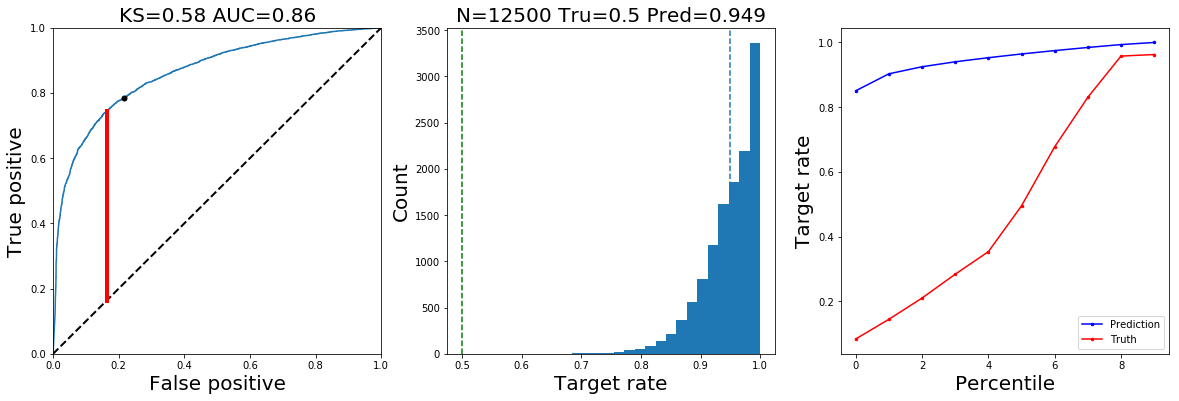

In [7]:
probs = np.array(probs)
gt = test_df.label
evaluate_performance(gt, probs)